In [1]:
import os
import warnings  # Add this line to import the warnings module
os.environ["OMP_NUM_THREADS"] = "1"  # Set to prevent memory leak


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')


In [4]:
data = pd.read_csv(r"C:\Users\Govardhan reddy17\OneDrive\Desktop\customer.csv") 


In [5]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [6]:
# View the first few rows of the dataset
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
#view last five rows
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18
199,200,1,30,137,83


In [8]:
# Check for any missing values
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# Select relevant features
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [10]:
# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [11]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


In [12]:
#Calculate Gender Count for Each Cluster
gender_count = data.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)

In [13]:
# Rename the Columns
gender_count = gender_count.rename(columns={
    0: 'Female Count',
    1: 'Male Count'
})



In [14]:
#  Display the Renamed DataFrame
print(gender_count)


Gender   Female Count  Male Count
Cluster                          
0                  12           8
1                  32          22
2                  22          18
3                  19          20
4                  27          20


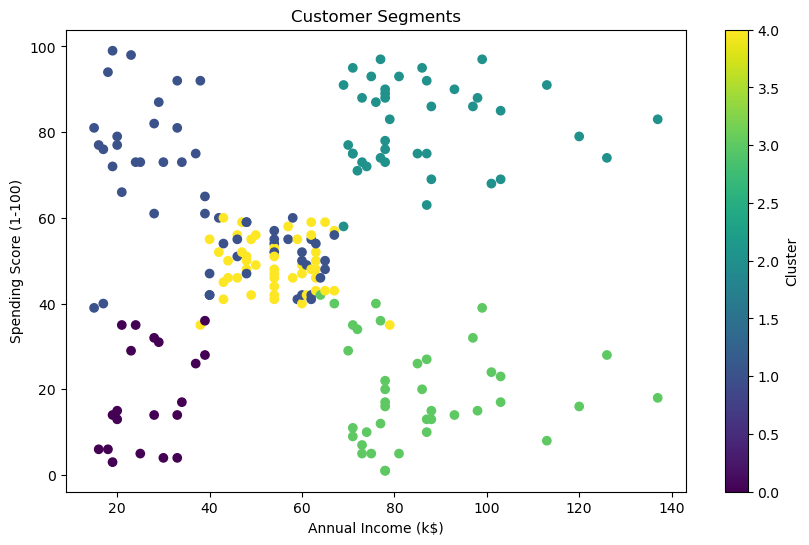

In [32]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()


In [15]:
# Analyze the clusters
cluster_analysis = data.groupby('Cluster').mean()
cluster_analysis

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,24.100000,0.400000,46.250000,26.750000,18.350000
1,55.648148,0.407407,25.185185,41.092593,62.240741
2,161.025000,0.450000,32.875000,86.100000,81.525000
3,159.743590,0.512821,39.871795,86.102564,19.358974
4,83.872340,0.425532,55.638298,54.382979,48.851064
